# Try it your self

In [17]:
import tensorflow.keras
import os
import random
import zipfile
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [15]:
model = tensorflow.keras.models.load_model('model2.h5')

In [18]:
test_filenames2 = os.listdir("Untitled Folder/")
test_df2 = pd.DataFrame({
    'filename': test_filenames2
})
nb_samples2 = test_df2.shape[0] # Nombre d'images de test

test_gen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_gen2.flow_from_dataframe(
    test_df2, 
    "Untitled Folder/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=150,
    shuffle=False
)

predict2 = model.predict_generator(test_generator2, steps=np.ceil(nb_samples2/150))




Found 6 validated image filenames.
Instructions for updating:
Please use Model.predict, which supports generators.


In [19]:
predict2
test_df2['category'] = np.argmax(predict2, axis=-1)
print(test_df2)

   filename  category
0  cat1.PNG         0
1  cat2.PNG         0
2  cat3.PNG         0
3  DOG1.PNG         1
4  DOG2.PNG         1
5  DOG3.PNG         1


In [24]:
label_map2 = dict((v,k) for k,v in ([('cat', 0), ('dog', 1)]))
test_df2['category'] = test_df2['category'].replace(label_map2)
test_df2

,filename,category
0,cat1.PNG,cat
1,cat2.PNG,cat
2,cat3.PNG,cat
3,DOG1.PNG,dog
4,DOG2.PNG,dog
5,DOG3.PNG,dog


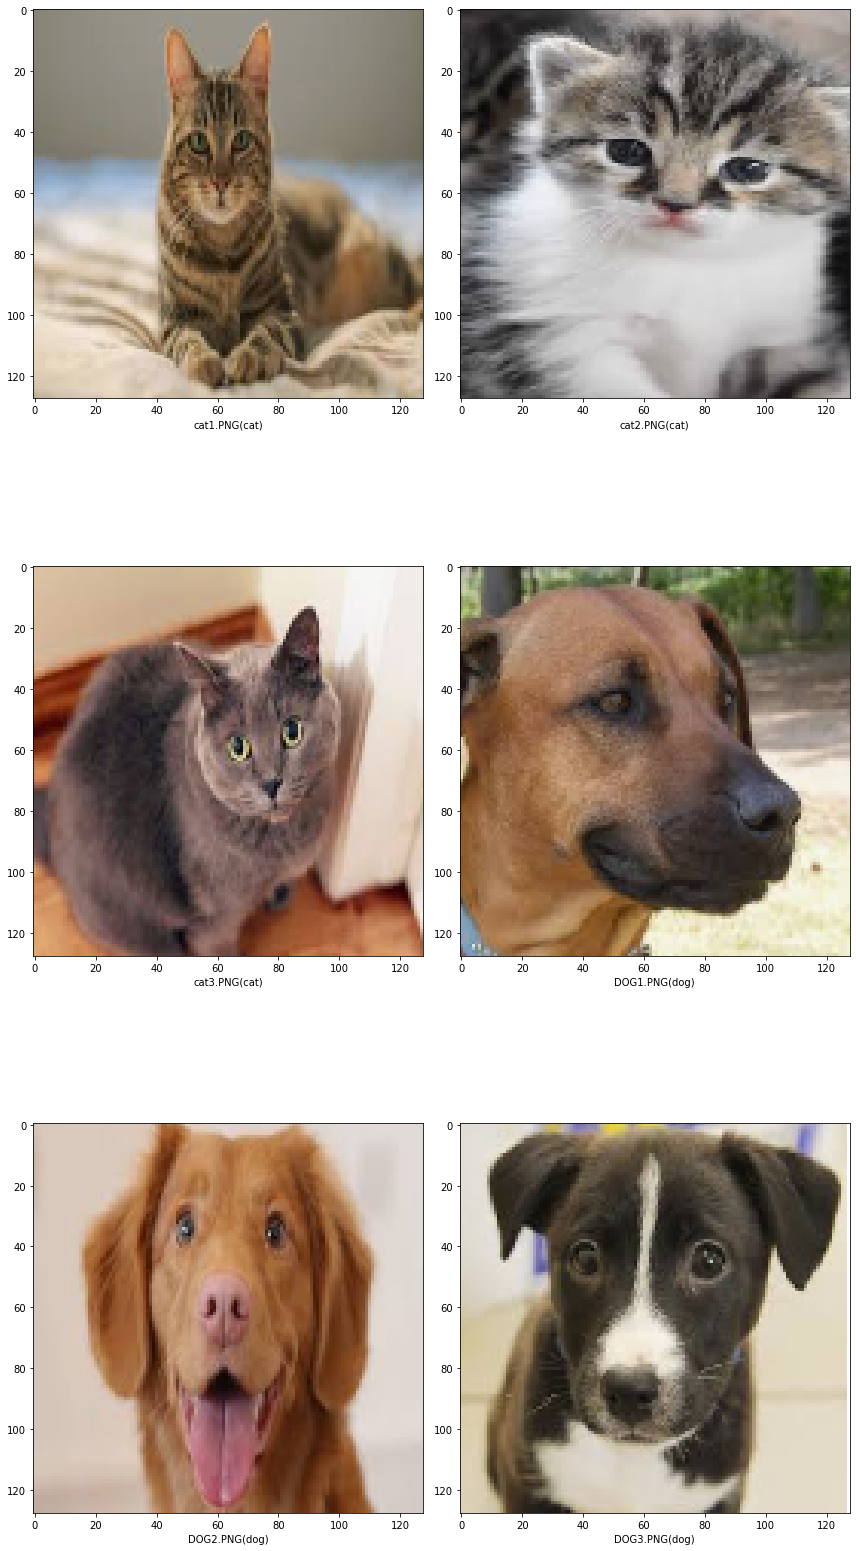

In [25]:
plt.figure(figsize=(12, 24))
for index, row in test_df2.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("Untitled Folder/"+filename, target_size=(128,128))
    plt.subplot(3, 2, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()